# Portfolio modeling
### Kirill Zakharov
#### 14.03.2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts
import yfinance as yf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
plt.style.use('ggplot')

In [80]:
# data import
names = ['SBER.ME','GAZP.ME', 'MTSS.ME', 'MGNT.ME', 'SNGS.ME', 'HYDR.ME', 'AFLT.ME', 'DSKY.ME', 'AAPL']
data = pd.DataFrame(columns=names)

for name in names:
    
    data[name] = yf.download(name, '2018-01-01', '2021-02-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [81]:
data.head(5)

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
Date,,,,,,,,,
2018-01-03,154.489380,116.169998,197.995163,5095.507324,26.139996,0.638334,127.199066,70.177948,41.373032
2018-01-04,159.086075,119.412567,202.738434,5208.654297,26.392916,0.650833,134.899857,71.621933,41.565216
2018-01-05,158.952835,120.493423,202.199417,5283.299316,26.435070,0.654023,133.450317,71.621933,42.038452
2018-01-09,160.151993,123.024216,203.421158,5185.867676,26.528746,0.654885,136.349426,71.116539,41.877506
2018-01-10,158.393234,126.038307,204.427307,5233.011719,26.673941,0.667988,135.262268,71.658035,41.867889


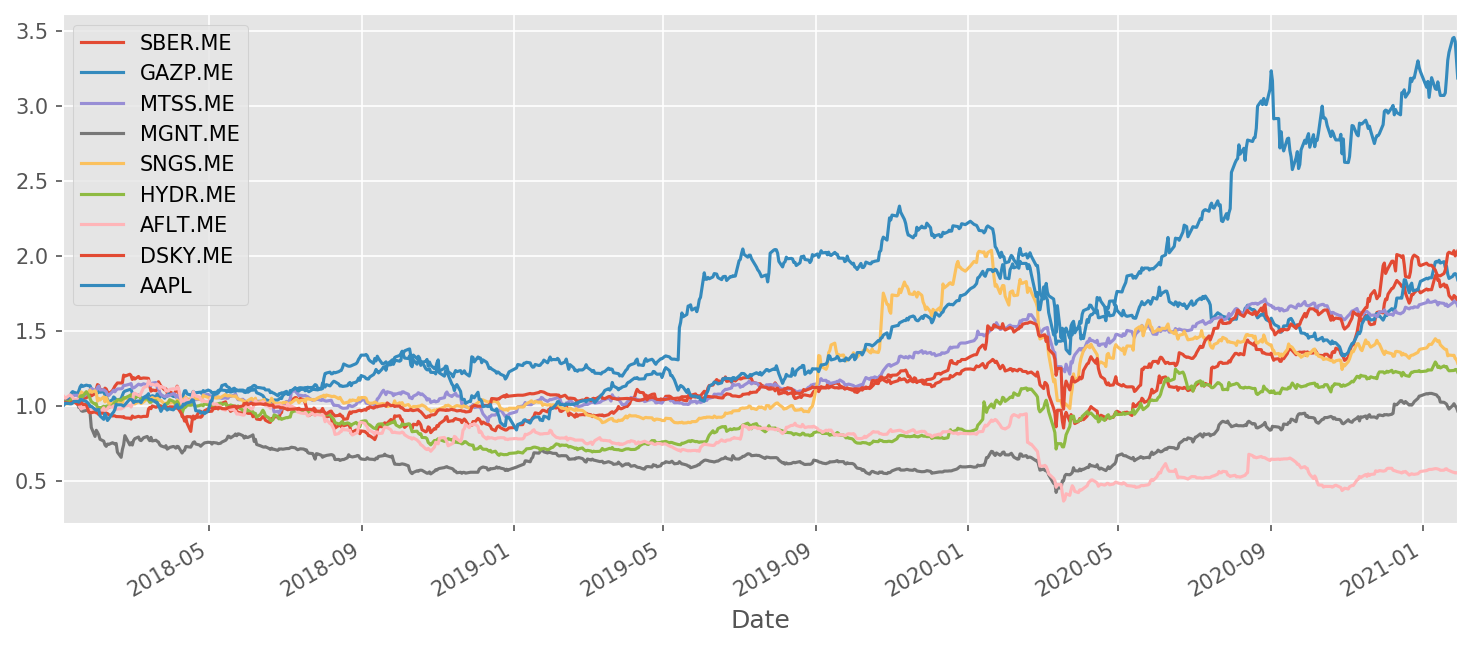

In [82]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)
(data.pct_change()+1).cumprod().plot(ax=ax)
plt.show()

## Daily return

In [83]:
return_pct = data.pct_change().apply(lambda x: np.log(1+x))
return_pct.head(4)

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
Date,,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,0.029320,0.027530,0.023674,0.021962,0.009629,0.019392,0.058779,0.020367,0.004634
2018-01-05,-0.000838,0.009011,-0.002662,0.014229,0.001596,0.004889,-0.010803,0.000000,0.011321
2018-01-09,0.007516,0.020786,0.006024,-0.018614,0.003537,0.001317,0.021492,-0.007081,-0.003836


In [84]:
mean_return = return_pct.mean(skipna=True)
mean_return*100

SBER.ME    0.066873
GAZP.ME    0.079152
MTSS.ME    0.066206
MGNT.ME   -0.004737
SNGS.ME    0.032354
HYDR.ME    0.026097
AFLT.ME   -0.077677
DSKY.ME    0.092079
AAPL       0.150438
dtype: float64

In [85]:
cov_matrix = return_pct.cov()
cov_matrix

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
SBER.ME,0.000417,0.000160,0.000124,0.000128,0.000117,0.000155,0.000189,0.000117,0.000096
GAZP.ME,0.000160,0.000298,0.000093,0.000104,0.000144,0.000106,0.000118,0.000059,0.000074
MTSS.ME,0.000124,0.000093,0.000170,0.000090,0.000093,0.000090,0.000083,0.000053,0.000076
MGNT.ME,0.000128,0.000104,0.000090,0.000389,0.000096,0.000126,0.000104,0.000039,0.000071
SNGS.ME,0.000117,0.000144,0.000093,0.000096,0.000391,0.000119,0.000120,0.000061,0.000076
HYDR.ME,0.000155,0.000106,0.000090,0.000126,0.000119,0.000305,0.000139,0.000074,0.000085
AFLT.ME,0.000189,0.000118,0.000083,0.000104,0.000120,0.000139,0.000527,0.000106,0.000045
DSKY.ME,0.000117,0.000059,0.000053,0.000039,0.000061,0.000074,0.000106,0.000276,0.000029
AAPL,0.000096,0.000074,0.000076,0.000071,0.000076,0.000085,0.000045,0.000029,0.000487


## Monthly return

In [112]:
#monthly return
new_data = data.resample('M').last().pct_change()
new_data.head(4)

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
Date,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,0.029868,-0.001395,-0.004531,-0.102814,-0.000870,0.077188,0.061140,-0.021622,0.068185
2018-03-31,-0.069126,-0.005798,-0.043726,-0.021330,-0.012015,-0.014843,0.100035,0.065746,-0.058051
2018-04-30,-0.104823,0.025293,0.007649,0.047436,0.037716,-0.032342,-0.074550,-0.031623,-0.015020


In [115]:
new_mean_return = new_data.mean()
new_mean_return*100

SBER.ME    1.455079
GAZP.ME    1.844039
MTSS.ME    1.205357
MGNT.ME    0.782798
SNGS.ME    0.936364
HYDR.ME    0.831741
AFLT.ME   -0.844261
DSKY.ME    2.420134
AAPL       3.821554
dtype: float64

In [123]:
new_cov_matrix = new_data.cov()

## Optimization

In [129]:
from scipy.optimize import linprog
from scipy.optimize import minimize

### Maximize porfolio return

In [116]:
c = new_mean_return
res = linprog(-c, A_eq=[np.ones(len(c))], b_eq=1, bounds=(0.05, 0.15))
w = res['x']
w

array([0.15, 0.15, 0.15, 0.05, 0.1 , 0.05, 0.05, 0.15, 0.15])

In [127]:
portf_r = round(np.dot(c, w), 4)
print(f'Return: {round(portf_r*100, 4)} %')

Return: 1.74 %


In [124]:
print(f'Risk: {np.round(np.dot(np.dot(w, new_cov_matrix), w)*100, 4)} %')

Risk: 0.3025 %


In [128]:
1000000*portf_r

17400.0

### Maximize Sharpe ratio

In [139]:
rf = 0.04

res1 = minimize(lambda x: -(x[0] - rf)/x[1], (0, 0), bounds=((0.01, 10), (0.01, 10)))
res1

      fun: -996.0000000000214
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  -99.99999975, 99599.90040898])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 2
   status: 0
  success: True
        x: array([1.e+01, 1.e-02])

In [235]:
num_portf = 10000
p_r = []
p_std = []
p_w = []

for i in range(num_portf):
    w = np.random.uniform(0.05, 0.15, len(names))
    w = w/np.sum(w)
    p_w.append(w)
    
    returns = np.dot(w, new_mean_return)
    p_r.append(returns*100)
    
    std = np.dot(np.dot(w, new_cov_matrix), w)
    p_std.append(std*100)

In [236]:
array = {'Returns':p_r, 'Risks':p_std}

for i, stock in enumerate(new_data.columns.tolist()):
    array[stock] = [w[i] for w in p_w]
    
portfolios = pd.DataFrame(array)    
portfolios.head(4)

,Returns,Risks,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL
0,1.287583,0.314466,0.128731,0.126248,0.085404,0.072925,0.133676,0.140824,0.122031,0.113132,0.077028
1,1.271551,0.302109,0.065734,0.111383,0.162805,0.138578,0.159657,0.060185,0.130511,0.055389,0.115757
2,1.392481,0.280565,0.074114,0.133656,0.126332,0.116455,0.114524,0.128011,0.087118,0.132269,0.087522
3,1.473817,0.311240,0.070226,0.134025,0.068625,0.137690,0.098978,0.101922,0.116205,0.132779,0.139550


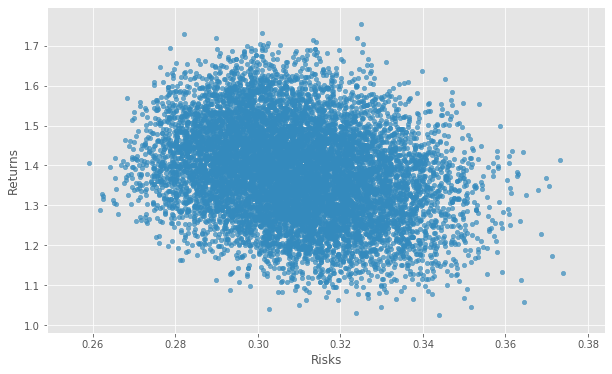

In [240]:
fig, ax = plt.subplots(figsize=(10, 6))
portfolios.plot.scatter(x='Risks', y='Returns', ax=ax, alpha=0.7)
plt.show()

In [238]:
sharpe = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Risks']).idxmax()]
sharpe

Returns    1.727719
Risks      0.282099
SBER.ME    0.082619
GAZP.ME    0.163932
MTSS.ME    0.160305
MGNT.ME    0.064956
SNGS.ME    0.057369
HYDR.ME    0.100336
AFLT.ME    0.056520
DSKY.ME    0.162798
AAPL       0.151165
Name: 8271, dtype: float64

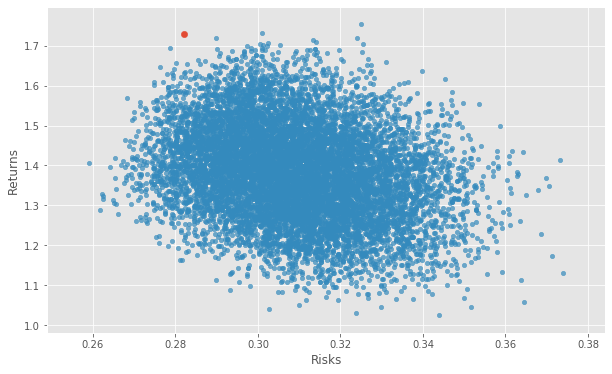

In [241]:
fig, ax = plt.subplots(figsize=(10, 6))
portfolios.plot(x='Risks', y='Returns', marker='o', kind='scatter', ax=ax, alpha=0.7)
plt.scatter(sharpe[1], sharpe[0], s=40)
plt.show()